In [1]:
import numpy as np
from skimage import io, img_as_float
from scipy.stats import chisquare, normaltest
import matplotlib.pyplot as plt
import cv2
import statistics

c:\users\veran\appdata\local\programs\python\python37-32\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


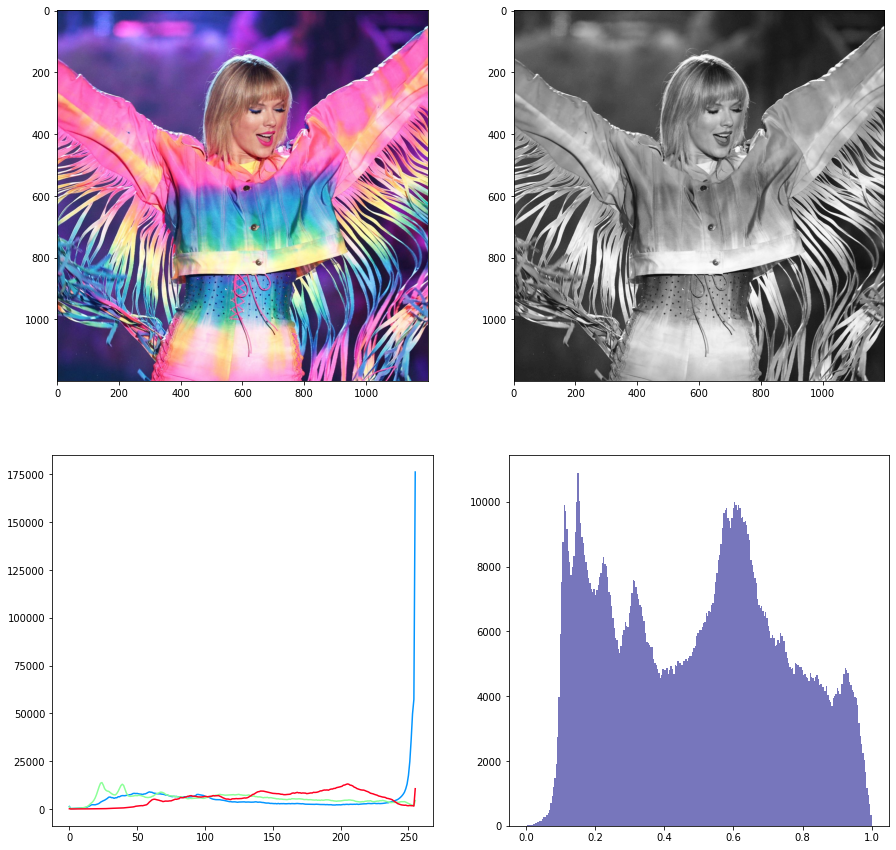

In [2]:
image = io.imread('taylor_lover.jpg')
grayscale_image = io.imread('taylor_lover.jpg', as_gray=True)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].imshow(image)
ax[0, 1].imshow(grayscale_image, cmap=plt.cm.gray)
ax[1, 1].hist(grayscale_image.flatten(), bins=256, range=(0, 1), color='#7776BC')

color = ('#0496FF','#8CFF98','#FF0022')
for i,col in enumerate(color):
    histogram = cv2.calcHist([image],[i],None,[256],[0,256])
    ax[1, 0].plot(histogram, color = col)

plt.show()

In [3]:
sample_mean = np.mean(grayscale_image)    # sample mean
# reshape our image to vector
grayscale_vector = np.reshape(grayscale_image, (1, 1440000))
grayscale_vector = list(grayscale_vector[0])
mean = statistics.mean(grayscale_vector)
std = np.std(grayscale_vector)
mode = statistics.mode(grayscale_vector)
median = statistics.median(grayscale_vector)
(mean, std, mode, median)

(0.4955866564384532,
 0.24960332861306442,
 0.1042964705882353,
 0.5164901960784314)

In [4]:
statistic, pvalue = chisquare(grayscale_vector)
if pvalue > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
statistic, pvalue

Probably Gaussian


(181027.11608003208, 1.0)

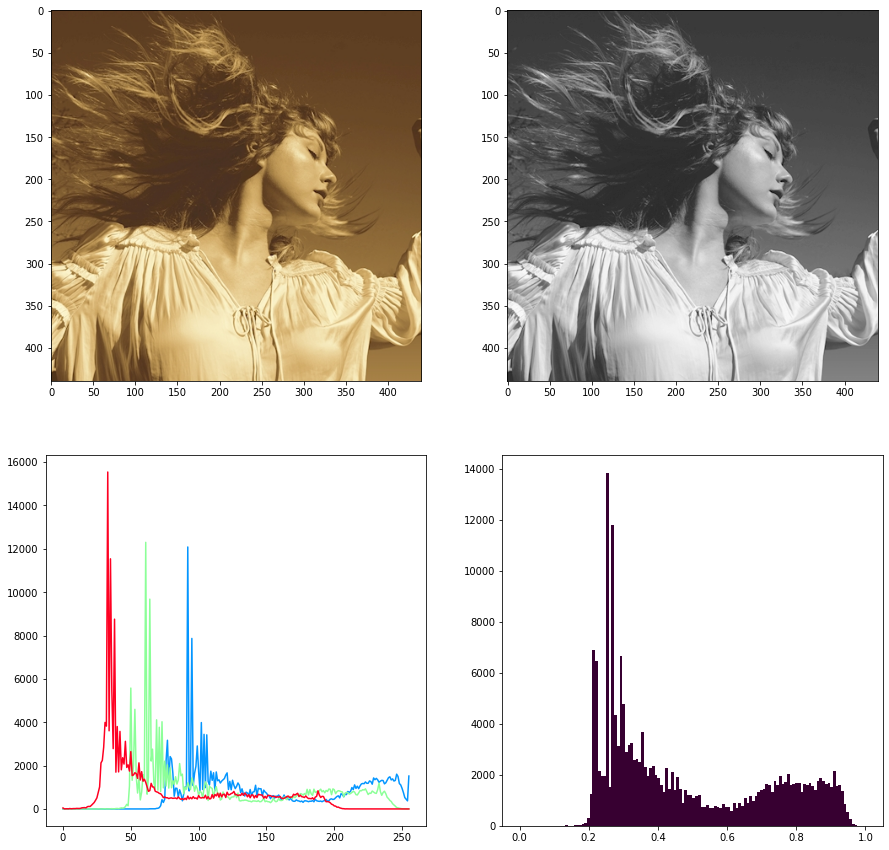

In [5]:
image = io.imread('taylor_fearless.jpg')
grayscale_image = io.imread('taylor_fearless.jpg', as_gray=True)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].imshow(image)
ax[0, 1].imshow(grayscale_image, cmap=plt.cm.gray)
ax[1, 1].hist(grayscale_image.flatten(), bins=128, range=(0, 1), color='#370031')

color = ('#0496FF','#8CFF98','#FF0022')
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0,256])
    ax[1, 0].plot(histogram, color = col)

plt.show()

In [6]:
sample_mean = np.mean(grayscale_image)    # sample mean
# reshape our image to vector
grayscale_vector = np.reshape(grayscale_image, (1, 193600))
grayscale_vector = list(grayscale_vector[0])
mean = statistics.mean(grayscale_vector)
std = statistics.stdev(grayscale_vector)
mode = statistics.mode(grayscale_vector)
median = statistics.median(grayscale_vector)
(mean, std, mode, median)

(0.4840599277872306,
 0.23606750614329508,
 0.2571321568627451,
 0.3901380392156863)

In [7]:
statistic, pvalue = chisquare(grayscale_vector[::50000])
if pvalue > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
statistic, pvalue

Probably Gaussian


(0.7796608274944277, 0.8543254517519316)